# Final term project

## 1. Members
* 2017572006 SooYeon Lee
* 2017572012 YunSong Jeong

## 2. Environments
* Python 3.5

## 3. Backend
* tensorflow-cpu

## 3. Preprocessing

In [1]:
import os
import numpy as np
# import cPickle
import _pickle as cPickle
import matplotlib.pylab as plt

In [2]:
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.ticker as mtick
## No bold!!

matplotlib.font_manager._rebuild()

import matplotlib as mpl
fmt = '{x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
mpl.rc('font',family='serif',serif='Times New Roman', size=15)

In [3]:
filepath = 'D:/DEAP_DONOTDISTRIBUTE/'
files = os.listdir(filepath)
print (len(files), files[0])

32 s01.dat


In [4]:
with open(filepath+files[0], 'rb') as f:
    d = cPickle.load(f, encoding='latin1') 

In [6]:
d['data'].shape

(40, 40, 8064)

data : 40 x 40 x 8064 (40 trials, 40 channel, 8064 frame)

Frequency : 128Hz

* 0 : valence
* 1 : arousal
* ~~2 : dominance~~
* ~~3 : liking~~

### 3.1 Threshold
The score is float so it is not classification problem. We should change numeric value to nominal value.
By plotting histogram of score of every participants, we choose threshold of labels.

In [8]:
alllabel = [[],[]]
for file in files:
    with open(filepath+file, 'rb') as f:
        d = cPickle.load(f, encoding='latin1') 
        for i in range(0,2):
            alllabel[i] = np.append(alllabel[i],d['labels'][:,i])

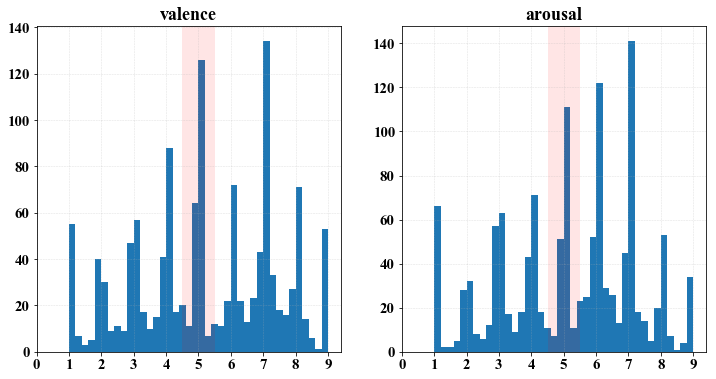

In [11]:
fig = plt.figure(figsize=(12,6))
labels = ['valence','arousal']
for i in range(0,2):
    ax1 = fig.add_subplot(1,2,i+1)
    ax1.grid(alpha=.4,linewidth=.5,linestyle='--')
    ax1.hist(alllabel[i],bins=40)
    ax1.axvspan(4.5,5.5,facecolor='#ff0000',alpha=.1)
    plt.xticks(range(0,10))
    plt.title(labels[i])
plt.show()

Threshold : ```x<=4.5, x>=5.5```

We removed 4.5~5.5, because it is ambiguous value. (We think it disturbs performance of classification)

### 3.2 Feature Selection
###  3.2.1 average box-plot (only first video, one person)

In [177]:
yes = []
no = []
for i in range(0,40):
    yes.append([])
    no.append([])

for file in files:

    with open(filepath+file, 'rb') as f:
        d = cPickle.load(f, encoding='latin1') 
        for i in range(0,40):
            label = ""
            if d['labels'][i][0]<=4.5:
                label="no"
            elif d['labels'][i][0]>=5.5:
                label="yes"
            else:
                continue
            for j in range(0,40):
                if label=="yes":
                    yes[j] = np.append(yes[j],np.average(d['data'][i][j:j+1:,][0]))
                elif label=="no":
                    no[j] = np.append(no[j],np.average(d['data'][i][j:j+1:,][0]))
    break

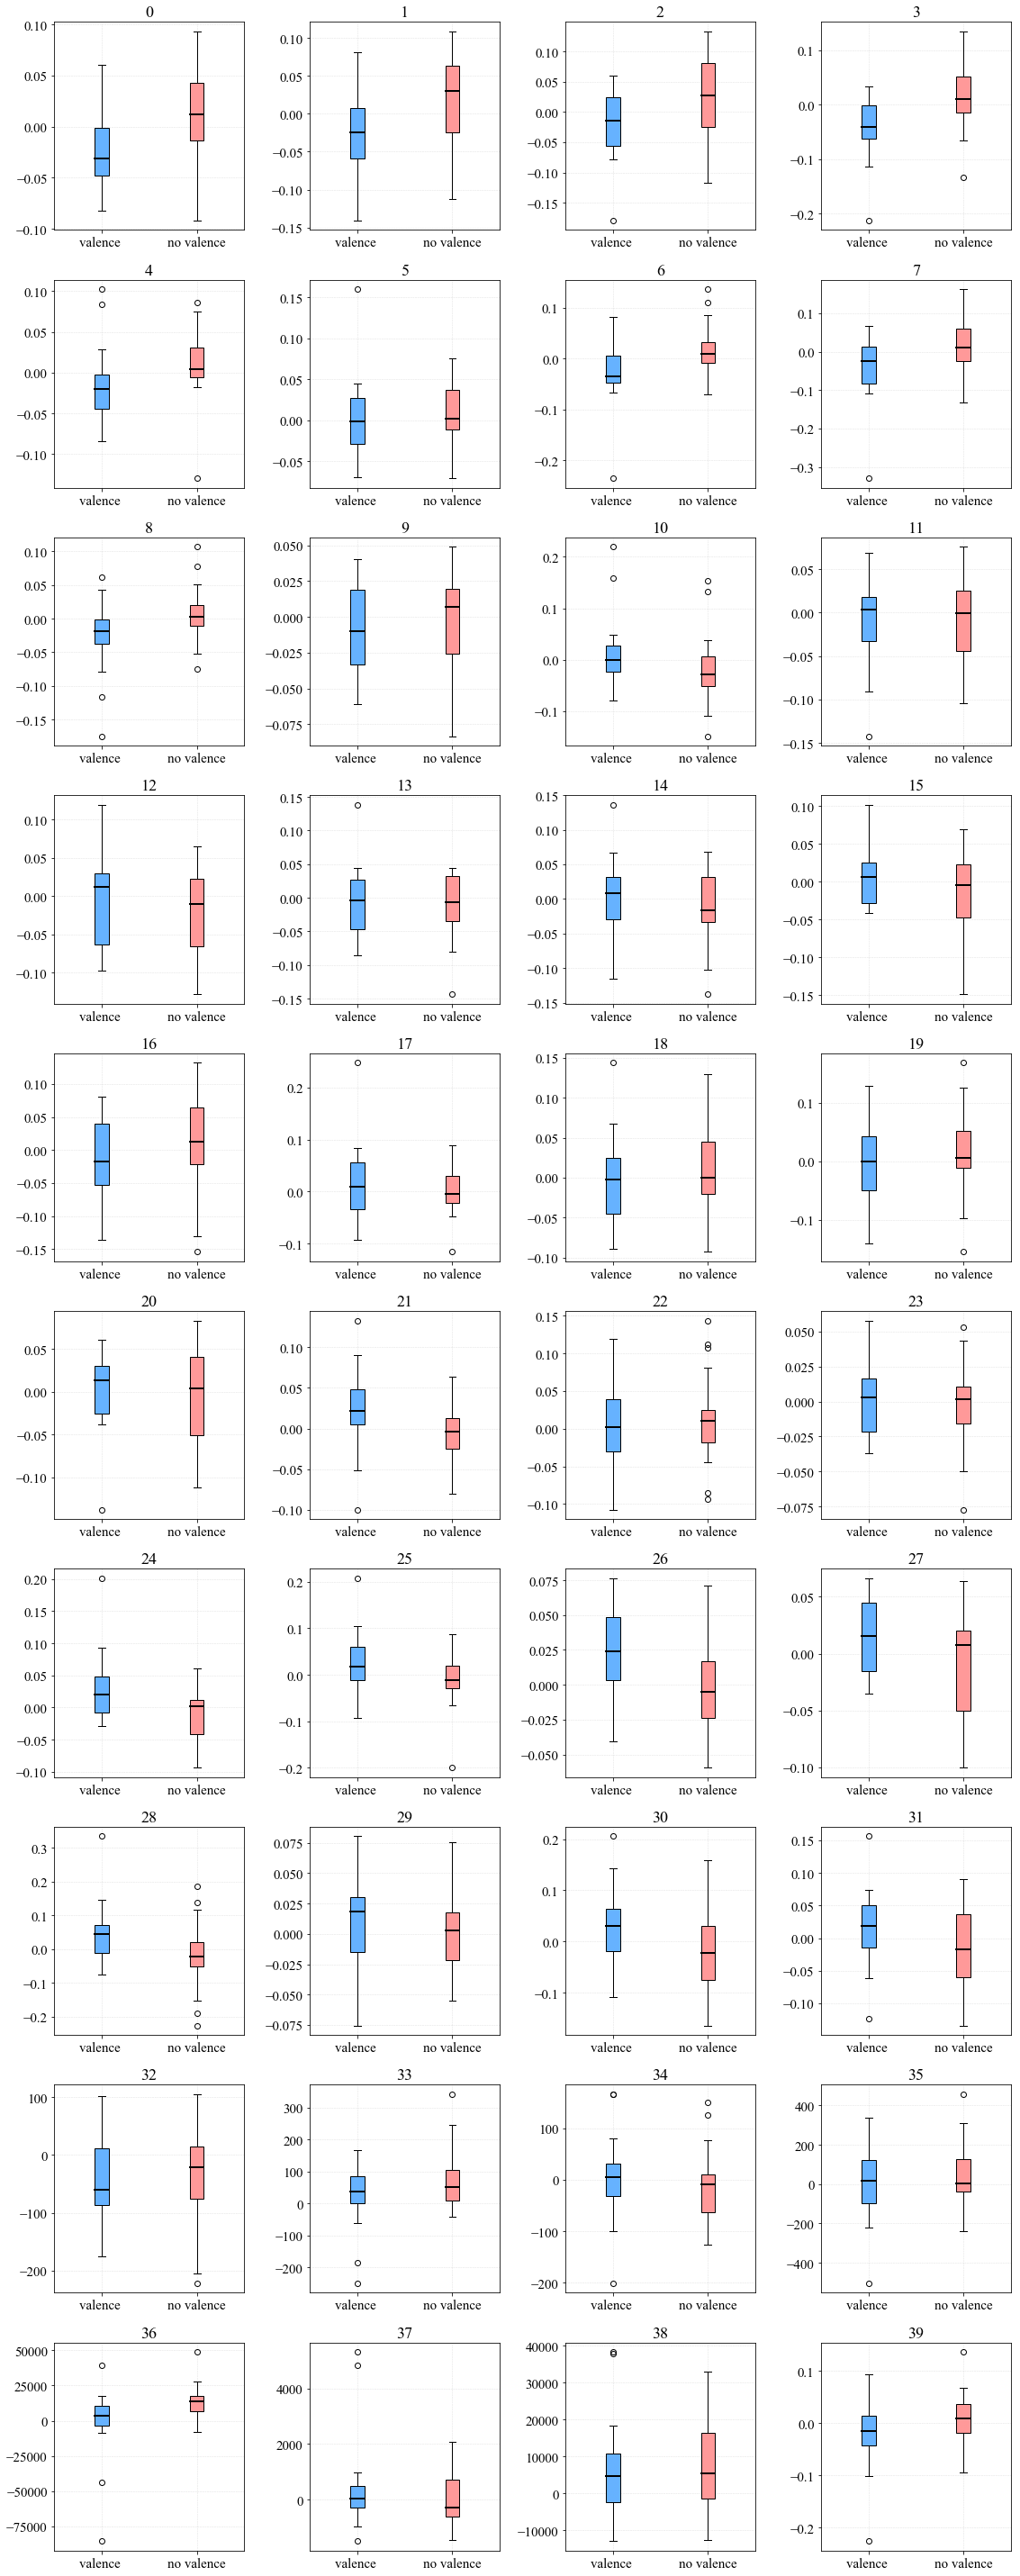

In [178]:

fig = plt.figure(figsize=(16,40))

for i in range(0,40):

    ax = fig.add_subplot(10,4,i+1)

    data = [yes[i], no[i]]
    
    bp = ax.boxplot(data, patch_artist = True)
    bp['boxes'][0].set(color='#000000', linewidth=1)
    bp['boxes'][0].set( facecolor = '#66B2FF' )
    bp['boxes'][1].set(color='#000000', linewidth=1)
    bp['boxes'][1].set( facecolor = '#FF9999' )

    bp['medians'][0].set(color='#000000', linewidth=2)
    bp['medians'][1].set(color='#000000', linewidth=2)
        # get position data for median line
    ax.grid(alpha=.4,linewidth=.5,linestyle='--')
    ax.set_xticklabels(['valence ', 'no valence'])
    plt.title(i)

fig.tight_layout()
plt.show()

We exclude variables which have similar box plot
**5,6,7,9,10,11,12,13,14,15,16,17,18,19,20,22,23,25,28,29,30,31,32,33,34,35,37,38,39**

We keep remainders **0,1,2,3,4,8,21,24,26,27,36** -> total of 11

another participant shows also big gap in average for these variables.

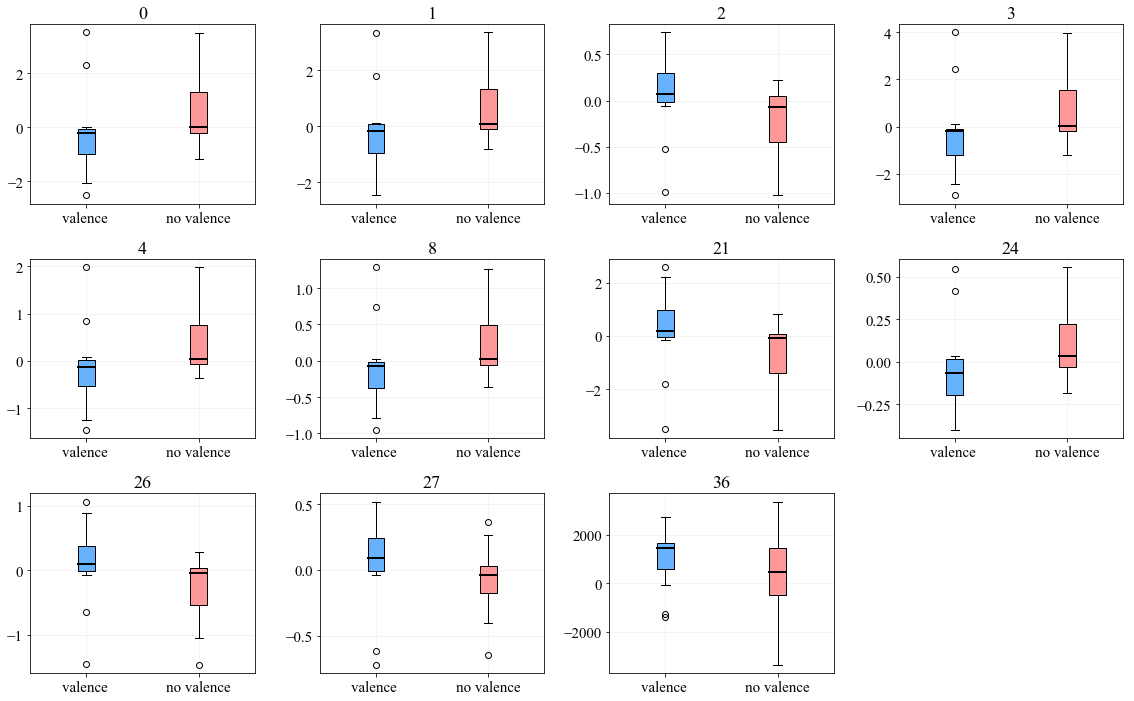

In [191]:
yes = []
no = []
only = [0,1,2,3,4,8,21,24,26,27,36]
for i in range(0,40):
    yes.append([])
    no.append([])

file = files[3]
with open(filepath+file, 'rb') as f:
    d = cPickle.load(f, encoding='latin1') 
    for i in range(0,40):
        label = ""
        if d['labels'][i][0]<=4.5:
            label="no"
        elif d['labels'][i][0]>=5.5:
            label="yes"
        else:
            continue
        for j in range(0,40):
            if label=="yes":
                yes[j] = np.append(yes[j],np.average(d['data'][i][j:j+1:,][0]))
            elif label=="no":
                no[j] = np.append(no[j],np.average(d['data'][i][j:j+1:,][0]))

fig = plt.figure(figsize=(16,10))
idx=0
for i in range(0,40):
    
    if i in only:
        idx+=1
        ax = fig.add_subplot(3,4,idx)

        data = [yes[i], no[i]]

        bp = ax.boxplot(data, patch_artist = True)
        bp['boxes'][0].set(color='#000000', linewidth=1)
        bp['boxes'][0].set( facecolor = '#66B2FF' )
        bp['boxes'][1].set(color='#000000', linewidth=1)
        bp['boxes'][1].set( facecolor = '#FF9999' )

        bp['medians'][0].set(color='#000000', linewidth=2)
        bp['medians'][1].set(color='#000000', linewidth=2)
            # get position data for median line
        ax.grid(alpha=.4,linewidth=.5,linestyle='--')
        ax.set_xticklabels(['valence ', 'no valence'])
        plt.title(i)

fig.tight_layout()
plt.show()

all participants' relative difference histogram

In [234]:
diff = []
for i in range(0,40):
    diff.append([])

for file in files:

    with open(filepath+file, 'rb') as f:
        d = cPickle.load(f, encoding='latin1') 
        y=[]
        n=[]
        for i in range(0,40):
            y.append([])
            n.append([])
        for i in range(0,40):
            label = ""
            if d['labels'][i][0]<=4.5:
                label="no"
            elif d['labels'][i][0]>=5.5:
                label="yes"
            else:
                continue
            for j in range(0,40):
                if label=="yes":
                    y[j] = np.append(y[j],np.average(d['data'][i][j:j+1:,][0]))
                elif label=="no":
                    n[j] = np.append(n[j],np.average(d['data'][i][j:j+1:,][0]))
    for i in range(0,40):
        rel_diff = (np.average(y[i])-np.average(n[i]))/np.average(y[i])
        diff[i]= np.append(diff[i],rel_diff)

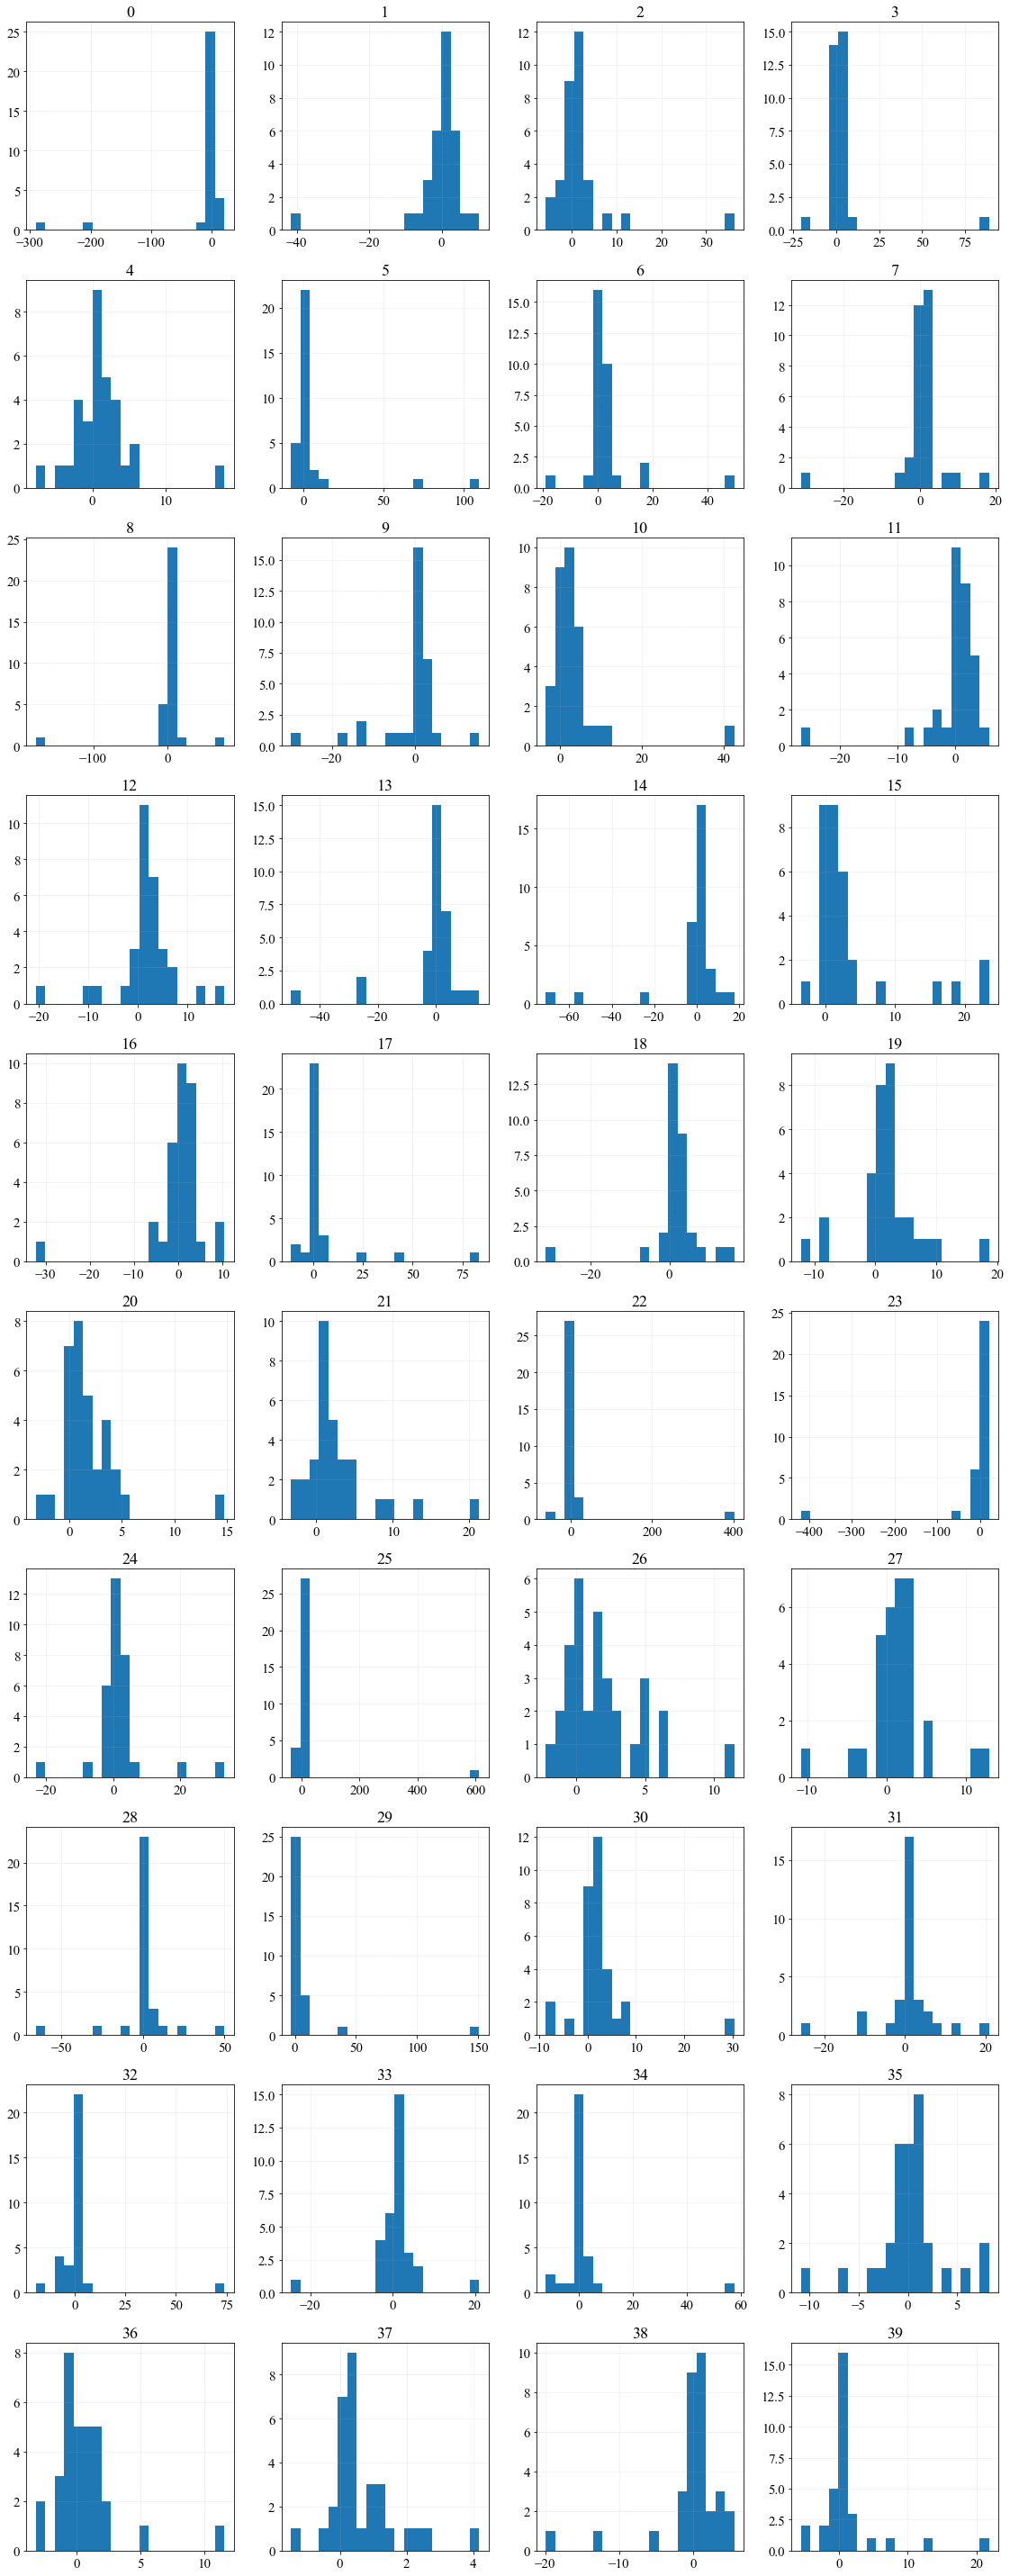

In [242]:

fig = plt.figure(figsize=(16,40))

for i in range(0,40):

    ax = fig.add_subplot(10,4,i+1)

    ax.hist(diff[i],bins=20)
        # get position data for median line
    ax.grid(alpha=.4,linewidth=.5,linestyle='--')
    plt.title(i)

fig.tight_layout()
plt.show()

Variables with relatively more non-zero and skewed -> good features 

**1,2,4,7,10,11,12,15,19,20,21,26,27,30,36,38**

### 3.2.2 t-value

In [246]:

def t_test(k, count_dict):
    yes = []
    no = []
    tTest = []
    for i in range(0,40):
        yes.append([])
        no.append([])

    with open(filepath+files[k], 'rb') as f:
        d = cPickle.load(f, encoding='latin1') 
        for i in range(0,40):
            label = ""
            if d['labels'][i][0]<=4.5:
                label="no"
            elif d['labels'][i][0]>=5.5:
                label="yes"
            else:
                continue
            for j in range(0,40):
                if label=="yes":
                    yes[j] = np.append(yes[j],np.average(d['data'][i][j:j+1:,][0]))
                elif label=="no":
                    no[j] = np.append(no[j],np.average(d['data'][i][j:j+1:,][0]))
    from scipy import stats


    for i in range(0,40):

        data = [yes[i], no[i]]
        tTestResult = stats.ttest_ind(data[0], data[1])
        if tTestResult[1] < 0.05:
            #print("channel %d has p-value : %.3f" %(i ,tTestResult[1]))
            tTest = np.append(tTest,[i, tTestResult[1]])
            count_dict[i] += 1
    return tTest

count_dict=dict()
for i in range(0,40):
    count_dict[i] = 0
for l in range(0,32):
    t_test(l, count_dict)
    
import operator
print(sorted(count_dict.items(), key=operator.itemgetter(1)))

[(16, 1), (17, 1), (24, 1), (27, 1), (30, 1), (31, 1), (1, 2), (9, 2), (10, 2), (13, 2), (20, 2), (23, 2), (34, 2), (35, 2), (37, 2), (39, 2), (3, 3), (4, 3), (8, 3), (11, 3), (18, 3), (21, 3), (25, 3), (28, 3), (29, 3), (32, 3), (38, 3), (0, 4), (2, 4), (5, 4), (6, 4), (7, 4), (12, 4), (15, 4), (19, 4), (22, 4), (26, 4), (14, 5), (33, 5), (36, 6)]


over 4 : **0,2,5,6,7,12,14,15,19,22,26,33,36**



### 3.2.3 power spectral density (frequency)



In [20]:
from numpy import sin, linspace, pi
from scipy import fft, arange

def plotSpectrum(y,Fs):

    n = len(y) # length of the signal
    k = arange(n)
    T = n/Fs
    frq = k/T # two sides frequency range

    frq = frq[range(int(n/2))] # one side frequency range

    Y = fft(y)/n # fft computing and normalization
    Y = Y[range(int(n/2))]

#     plt.plot(frq,abs(Y),'r') # plotting the spectrum
#     plt.xlabel('Freq (Hz)')
#     plt.ylabel('|Y(freq)|')
    return frq, abs(Y)


In [209]:
yes = []
no = []

for i in range(0,40):
    yes.append([])
    no.append([])

file = files[0]
with open(filepath+file, 'rb') as f:
    d = cPickle.load(f, encoding='latin1') 
    
    for i in range(0,40):
        label = ""
        if d['labels'][i][0]<=4.5:
            label="no"
        elif d['labels'][i][0]>=5.5:
            label="yes"
        else:
            continue
        for j in range(0,40):
            frq,y = plotSpectrum(d['data'][i][j:j+1:,][0],8064)
            maxfreq = y.argmax(axis=0)
            if maxfreq==1387:
                ind = np.argpartition(y, -2)[-2:]
                for k in ind:
                    if k!=1387:
                        maxfreq=k
            if label=="yes":
                yes[j] = np.append(yes[j],maxfreq)
            elif label=="no":
                no[j] = np.append(no[j],maxfreq)


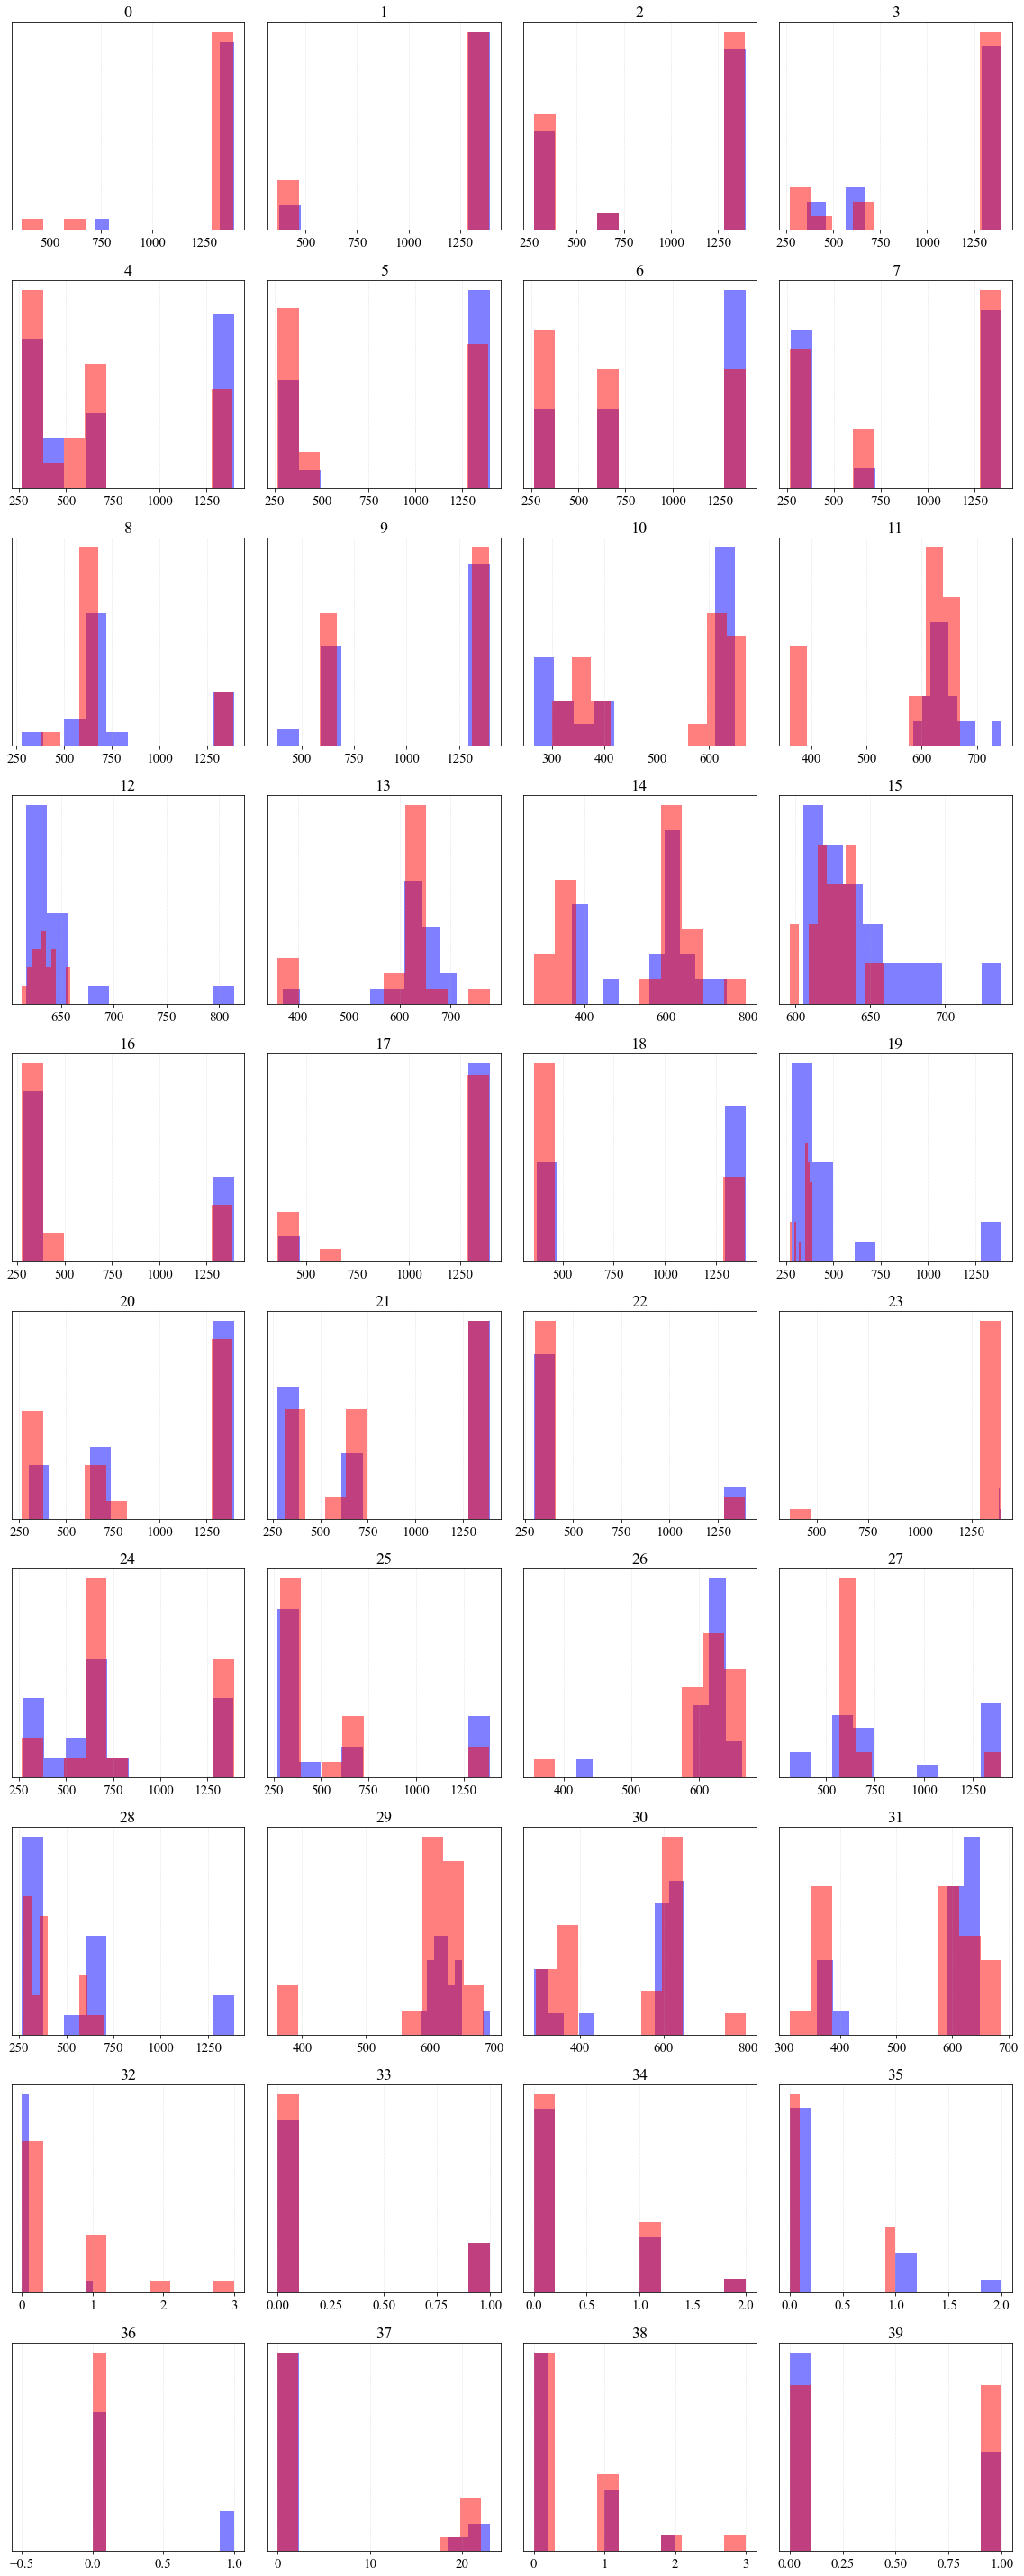

In [214]:
fig = plt.figure(figsize=(16,40))

for i in range(0,40):

    ax = fig.add_subplot(10,4,i+1)
    ax.hist(yes[i],bins=10,color='b',alpha=.5)
    ax.hist(no[i],bins=10,color='r',alpha=.5)
    data = [yes[i], no[i]]
    
    ax.grid(alpha=.4,linewidth=.5,linestyle='--')
    plt.yticks([])
    plt.title(i)

fig.tight_layout()
plt.show()

Frequency difference : **0,11,12,15,19,23,29,32,35,36**

---

* average : 0,1,2,3,4,8,21,24,26,27,36
* average difference : 1,2,4,7,10,11,12,15,19,20,21,26,27,30,36,38
* t-test : 0,2,5,6,7,12,14,15,19,22,26,33,36
* frequency : 0,11,12,15,19,23,29,32,35,36


sum up : **0,2,12,15,19,36**


### 3.2.4 arousal
We repeat same procedure to arousal, because the signals that related with arousal and valence are different each other.

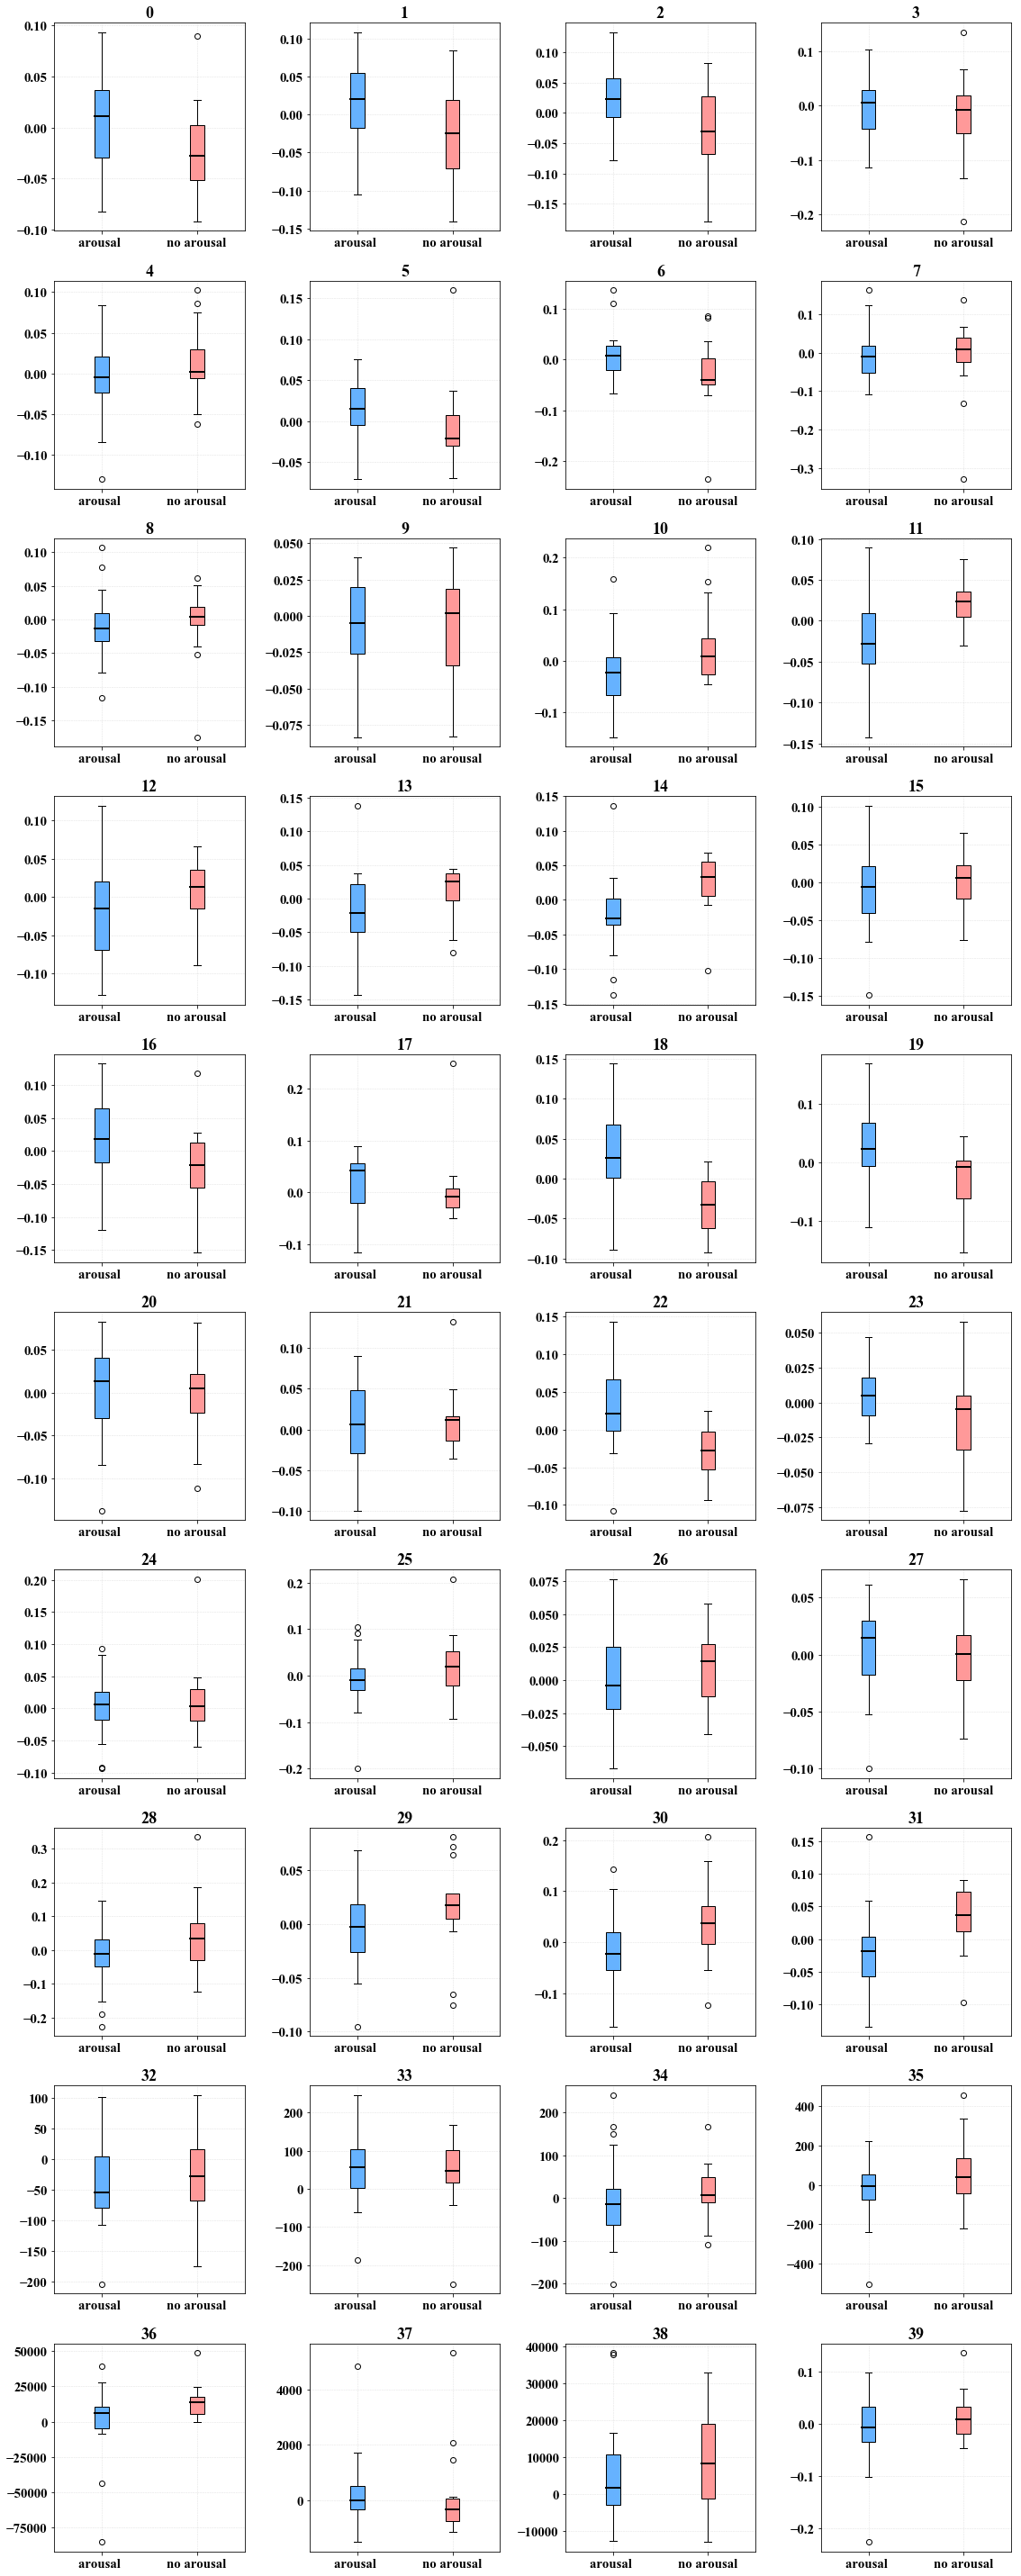

In [13]:
yes = []
no = []
for i in range(0,40):
    yes.append([])
    no.append([])

for file in files:

    with open(filepath+file, 'rb') as f:
        d = cPickle.load(f, encoding='latin1') 
        for i in range(0,40):
            label = ""
            if d['labels'][i][1]<=4.5:
                label="no"
            elif d['labels'][i][1]>=5.5:
                label="yes"
            else:
                continue
            for j in range(0,40):
                if label=="yes":
                    yes[j] = np.append(yes[j],np.average(d['data'][i][j:j+1:,][0]))
                elif label=="no":
                    no[j] = np.append(no[j],np.average(d['data'][i][j:j+1:,][0]))
    break

fig = plt.figure(figsize=(16,40))

for i in range(0,40):

    ax = fig.add_subplot(10,4,i+1)

    data = [yes[i], no[i]]
    
    bp = ax.boxplot(data, patch_artist = True)
    bp['boxes'][0].set(color='#000000', linewidth=1)
    bp['boxes'][0].set( facecolor = '#66B2FF' )
    bp['boxes'][1].set(color='#000000', linewidth=1)
    bp['boxes'][1].set( facecolor = '#FF9999' )

    bp['medians'][0].set(color='#000000', linewidth=2)
    bp['medians'][1].set(color='#000000', linewidth=2)
        # get position data for median line
    ax.grid(alpha=.4,linewidth=.5,linestyle='--')
    ax.set_xticklabels(['arousal ', 'no arousal'])
    plt.title(i)

fig.tight_layout()
plt.show()

average : **5,11,14,18,19,22,31** total of 7

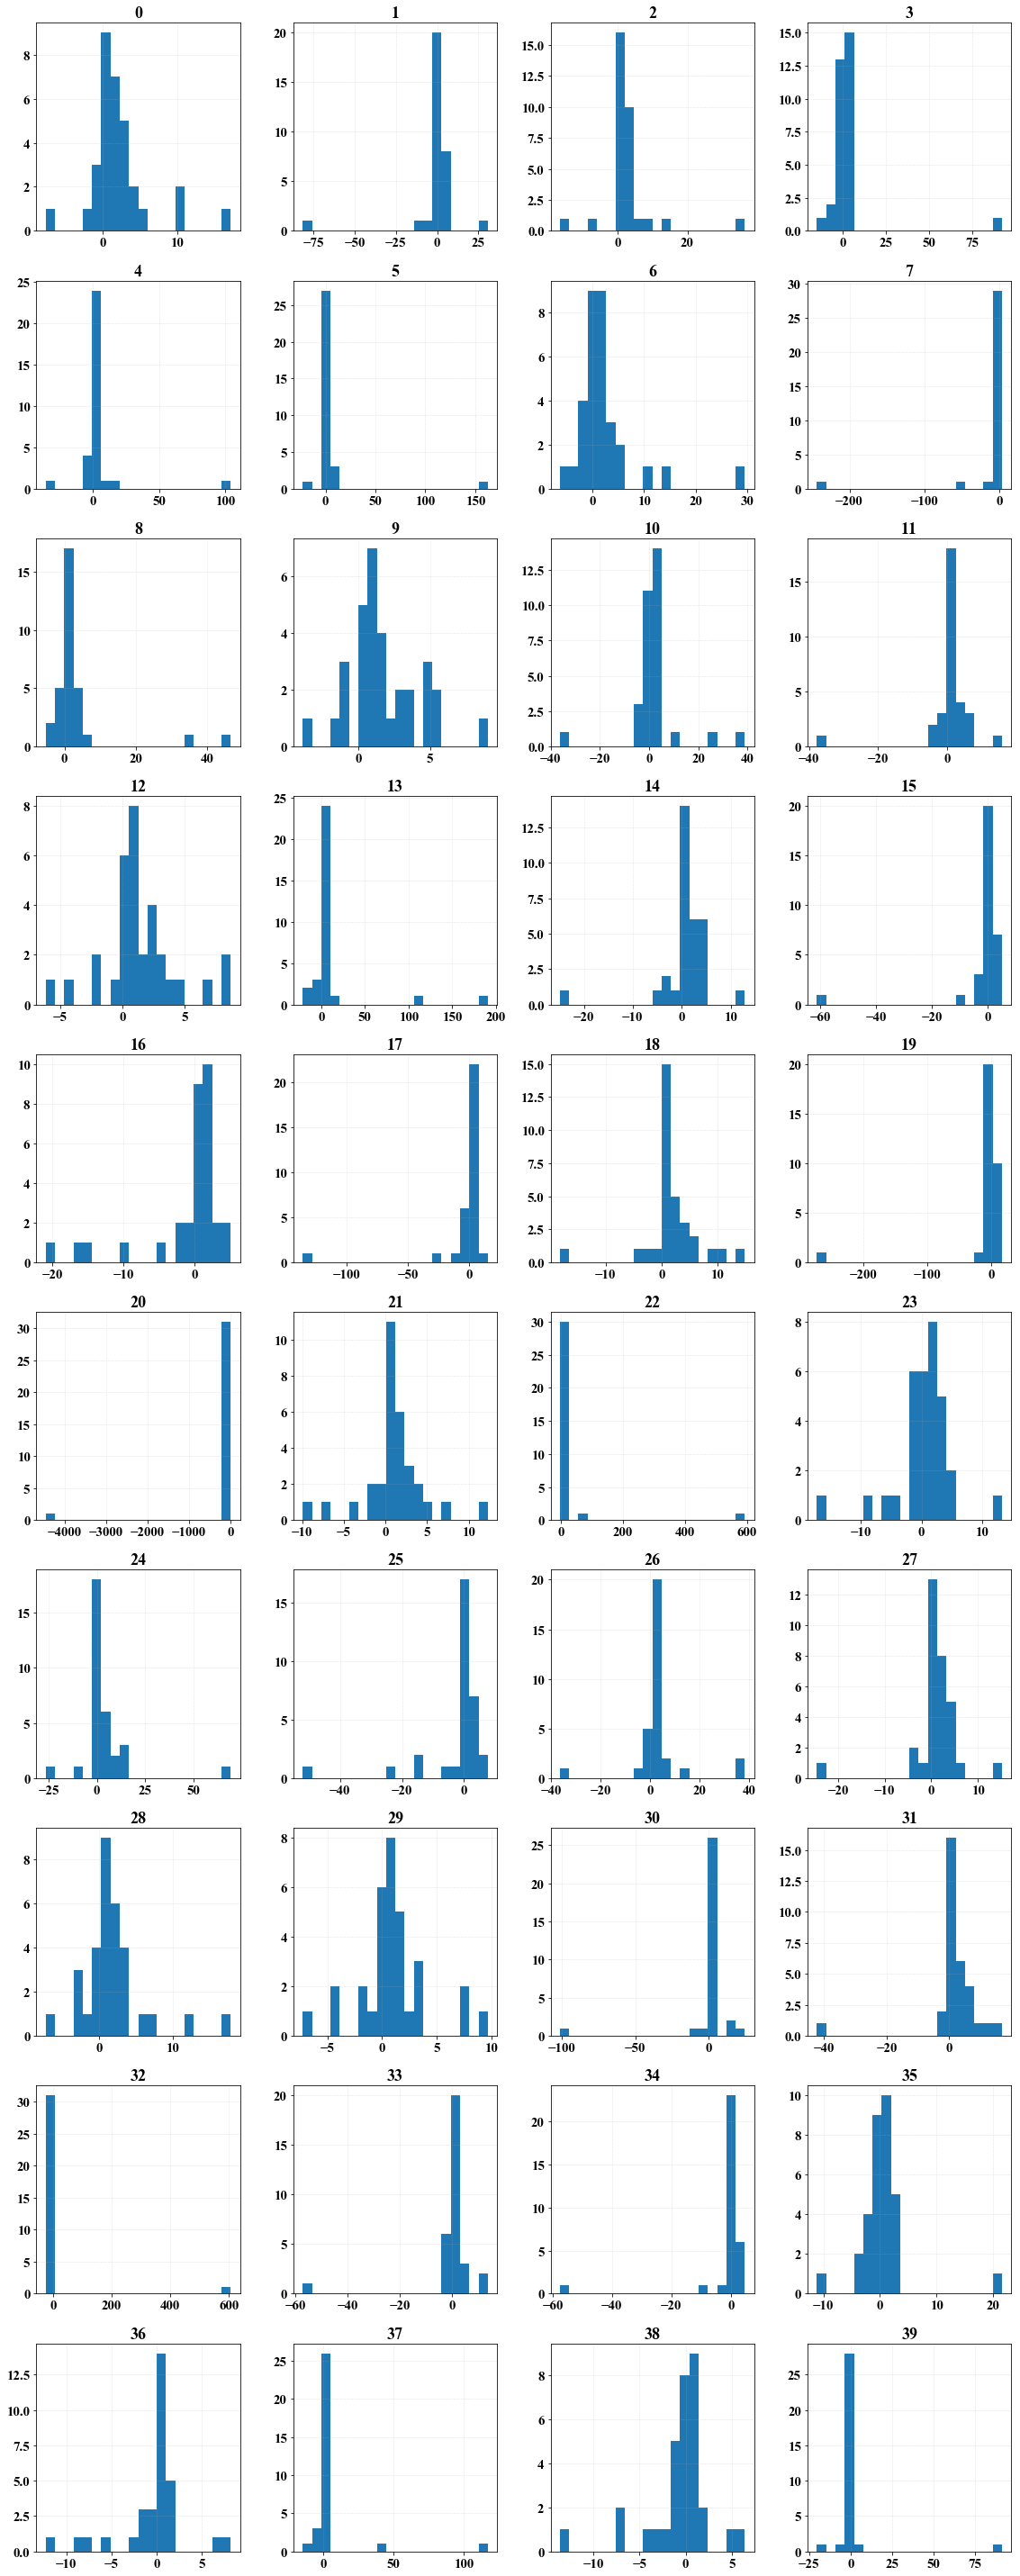

In [17]:
diff = []
for i in range(0,40):
    diff.append([])

for file in files:

    with open(filepath+file, 'rb') as f:
        d = cPickle.load(f, encoding='latin1') 
        y=[]
        n=[]
        for i in range(0,40):
            y.append([])
            n.append([])
        for i in range(0,40):
            label = ""
            if d['labels'][i][1]<=4.5:
                label="no"
            elif d['labels'][i][1]>=5.5:
                label="yes"
            else:
                continue
            for j in range(0,40):
                if label=="yes":
                    y[j] = np.append(y[j],np.average(d['data'][i][j:j+1:,][0]))
                elif label=="no":
                    n[j] = np.append(n[j],np.average(d['data'][i][j:j+1:,][0]))
    for i in range(0,40):
        rel_diff = (np.average(y[i])-np.average(n[i]))/np.average(y[i])
        diff[i]= np.append(diff[i],rel_diff)
        

fig = plt.figure(figsize=(16,40))

for i in range(0,40):

    ax = fig.add_subplot(10,4,i+1)

    ax.hist(diff[i],bins=20)
        # get position data for median line
    ax.grid(alpha=.4,linewidth=.5,linestyle='--')
    plt.title(i)

fig.tight_layout()
plt.show()

average difference : ** 6,9,12,14,16,21,23,28,29,31,35,38 **

In [18]:

def t_test(k, count_dict):
    yes = []
    no = []
    tTest = []
    for i in range(0,40):
        yes.append([])
        no.append([])

    with open(filepath+files[k], 'rb') as f:
        d = cPickle.load(f, encoding='latin1') 
        for i in range(0,40):
            label = ""
            if d['labels'][i][1]<=4.5:
                label="no"
            elif d['labels'][i][1]>=5.5:
                label="yes"
            else:
                continue
            for j in range(0,40):
                if label=="yes":
                    yes[j] = np.append(yes[j],np.average(d['data'][i][j:j+1:,][0]))
                elif label=="no":
                    no[j] = np.append(no[j],np.average(d['data'][i][j:j+1:,][0]))
    from scipy import stats


    for i in range(0,40):

        data = [yes[i], no[i]]
        tTestResult = stats.ttest_ind(data[0], data[1])
        if tTestResult[1] < 0.05:
            #print("channel %d has p-value : %.3f" %(i ,tTestResult[1]))
            tTest = np.append(tTest,[i, tTestResult[1]])
            count_dict[i] += 1
    return tTest

count_dict=dict()
for i in range(0,40):
    count_dict[i] = 0
for l in range(0,32):
    t_test(l, count_dict)
    
import operator
print(sorted(count_dict.items(), key=operator.itemgetter(1)))

[(6, 0), (9, 0), (12, 0), (13, 0), (25, 0), (27, 0), (5, 1), (7, 1), (8, 1), (14, 1), (15, 1), (20, 1), (21, 1), (29, 1), (31, 1), (32, 1), (33, 1), (34, 1), (37, 1), (39, 1), (0, 2), (1, 2), (3, 2), (4, 2), (17, 2), (18, 2), (22, 2), (24, 2), (28, 2), (2, 3), (11, 3), (16, 3), (19, 3), (26, 3), (30, 3), (35, 3), (36, 3), (38, 3), (10, 4), (23, 4)]


t-value : **2,10,11,16,19,23,26,30,35,36,38**

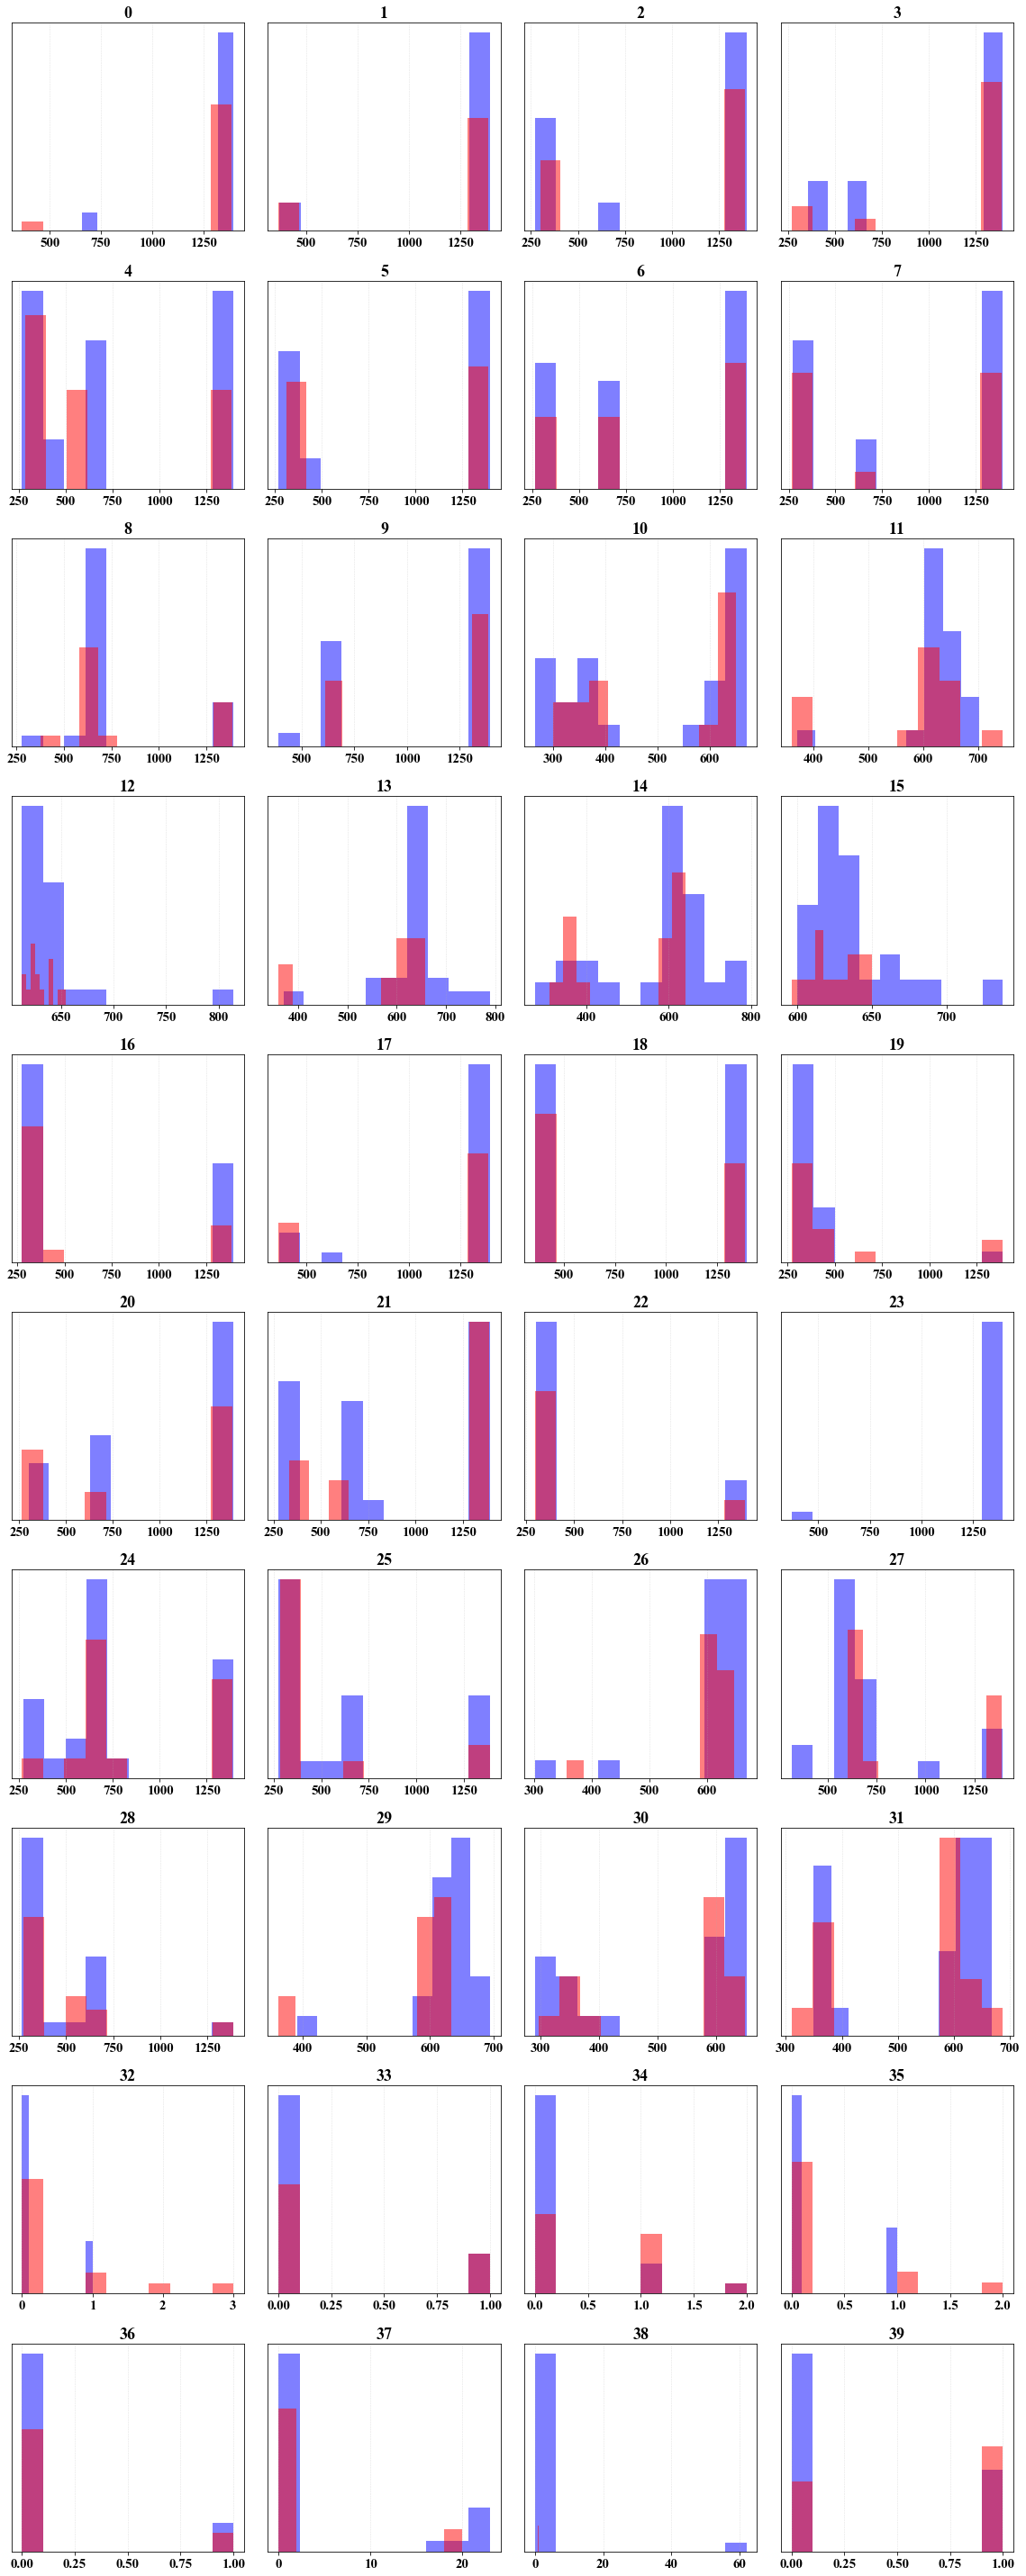

In [21]:
yes = []
no = []

for i in range(0,40):
    yes.append([])
    no.append([])

file = files[0]
with open(filepath+file, 'rb') as f:
    d = cPickle.load(f, encoding='latin1') 
    
    for i in range(0,40):
        label = ""
        if d['labels'][i][1]<=4.5:
            label="no"
        elif d['labels'][i][1]>=5.5:
            label="yes"
        else:
            continue
        for j in range(0,40):
            frq,y = plotSpectrum(d['data'][i][j:j+1:,][0],8064)
            maxfreq = y.argmax(axis=0)
            if maxfreq==1387:
                ind = np.argpartition(y, -2)[-2:]
                for k in ind:
                    if k!=1387:
                        maxfreq=k
            if label=="yes":
                yes[j] = np.append(yes[j],maxfreq)
            elif label=="no":
                no[j] = np.append(no[j],maxfreq)

fig = plt.figure(figsize=(16,40))

for i in range(0,40):

    ax = fig.add_subplot(10,4,i+1)
    ax.hist(yes[i],bins=10,color='b',alpha=.5)
    ax.hist(no[i],bins=10,color='r',alpha=.5)
    data = [yes[i], no[i]]
    
    ax.grid(alpha=.4,linewidth=.5,linestyle='--')
    plt.yticks([])
    plt.title(i)

fig.tight_layout()
plt.show()

frequency : nothing

---

* average : 5,11,14,18,19,22,31
* average difference : 6,9,12,14,16,21,23,28,29,31,35,38 
* t-value : 2,10,11,16,19,23,26,30,35,36,38

sum up : ** 11,16,19,23,31,35,38**


## 3.3 Feature processing

We should make proper vector to learn (average, average difference, t-test, frequency)

Feture we will use is :
* valence : 0,2,12,15,19,36
* arousal : 11,16,19,23,31,35,38


### 3.3.1 Use LSTM model. (Feature is handled as sequence)
8024*5 (channels) is too long. We should sampling the sequence.
1. Truncate sequences
    * delete first and last 128. (1s)
2. Under sampling
    * Change frame rate 128Hz to 32Hz

Normalizing



In [107]:
from sklearn.preprocessing import normalize

val_channel = [0,2,12,15,19,36]
all_result = []
labels = []
for file in files:
    with open(filepath+file, 'rb') as f:
        d = cPickle.load(f, encoding='latin1')
        for i in range(0,40):
            result = []
            label = ""
#             if d['labels'][i][0]<=4.5:
#                 label="0"
#             elif d['labels'][i][0]>=5.5:
#                 label="1"
#             else:
#                 continue
            labels.append(d['labels'][i][0])
            for j in val_channel:
                #Normalize
                seq = d['data'][i][j] / np.linalg.norm(d['data'][i][j])
                result.append(seq)
            all_result.append(result)

In [108]:
X = np.asarray(all_result).transpose(0,2,1)

In [109]:
X.shape

(1280, 8064, 6)

### 3.3.2 Use machine learning model. (Feature should be handled as one vector. 8024->1)
* average
* variance
* slope
* etc.. we need some idea!!

## 3.4 Experiments

### 3.4.1 LSTM

In [68]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.layers import Dropout

In [129]:
X.shape

(1280, 8064, 6)

In [130]:
Y= np.array(labels)
Y.shape

(1280,)

(sample num x timesteps x features)

In [139]:
neurons = 10
model = Sequential()
model.add(LSTM(neurons, return_sequences=True, input_shape=(X.shape[1], X.shape[2])))
model.add(LSTM(neurons, activation='relu'))
model.add(Dense(1,activation='relu'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_21 (LSTM)               (None, 8064, 10)          680       
_________________________________________________________________
lstm_22 (LSTM)               (None, 10)                840       
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 11        
Total params: 1,531
Trainable params: 1,531
Non-trainable params: 0
_________________________________________________________________
None


In [115]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [134]:
print (X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(857, 8064, 6) (423, 8064, 6) (857,) (423,)


In [140]:
model.fit(X_train, y_train, epochs=3)

Epoch 1/3
857/857 [==============================] - 211s 247ms/step - loss: 18.2779 - acc: 0.0000e+00
Epoch 2/3
857/857 [==============================] - 209s 244ms/step - loss: 7.5861 - acc: 0.0012
Epoch 3/3
857/857 [==============================] - 212s 248ms/step - loss: nan - acc: 0.0000e+00
